In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading data from a web page using pandas function read_html (documentation: https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.read_html.html) and convert it to the pandas data frame.

In [2]:
tables = pd.read_html("https://volby.cz/pls/ep2014/ep2111?xjazyk=CZ&xv=1&xt=2&xstrana=0", \
                      skiprows = 2, decimal = ",", thousands = ".")

In [3]:
df = pd.DataFrame(tables[0])

A possible problem here that pandas function read_html could convert floating point data type to integer. 

Solution: to use as parameters: *decimal = "," and thousands = "."*

In [4]:
df.dtypes

0       int64
1      object
2       int64
3      object
4       int64
5      object
6      object
7      object
8     float64
9      object
10     object
dtype: object

0       int64
1      object
2       int64
3      object
4       int64
5      object
6      object
7      object
8     float64
9      object
10     object
dtype: object

Renaming column headers.

In [5]:
columns_name = ["Political party #", "Political party name", "Candidate #", "Candidate name", "Candidate age", \
                "Proposing Party", "Political jurisdiction", "Preferred voices abs.", "Preferred voices %", \
               "Mandate", "Order"]

In [6]:
df.columns = columns_name

In [7]:
df.head()

,Political party #,Political party name,Candidate #,Candidate name,Candidate age,Proposing Party,Political jurisdiction,Preferred voices abs.,Preferred voices %,Mandate,Order
0,1,SNK ED,1,Kroupa Daniel Mgr. Ph.D.,65,SNK ED,BEZPP,2 192,27.53,-,-
1,1,SNK ED,2,Sedláčková Olga Mgr. MBA,51,SNK ED,SNK ED,203,2.54,-,-
2,1,SNK ED,3,Vlk Radoslav Mgr. Ph.D.,39,SNK ED,SNK ED,224,2.81,-,-
3,1,SNK ED,4,Halanová Květa Mgr.,55,SNK ED,SNK ED,152,1.90,-,-
4,1,SNK ED,5,Witzany Jiří Doc. RNDr. Ph.D.,48,SNK ED,SNK ED,554,6.95,-,-


,Political party #,Political party name,Candidate #,Candidate name,Candidate age,Proposing Party,Political jurisdiction,Preferred voices abs.,Preferred voices %,Mandate,Order
0,1,SNK ED,1,Kroupa Daniel Mgr. Ph.D.,65,SNK ED,BEZPP,2 192,27.53,-,-
1,1,SNK ED,2,Sedláčková Olga Mgr. MBA,51,SNK ED,SNK ED,203,2.54,-,-
2,1,SNK ED,3,Vlk Radoslav Mgr. Ph.D.,39,SNK ED,SNK ED,224,2.81,-,-
3,1,SNK ED,4,Halanová Květa Mgr.,55,SNK ED,SNK ED,152,1.90,-,-
4,1,SNK ED,5,Witzany Jiří Doc. RNDr. Ph.D.,48,SNK ED,SNK ED,554,6.95,-,-


Save dataframe as csv file.

In [8]:
df.to_csv('Elections_2015', index=False)

Age is a continuous numerical feature and for more clear visualization used binning.

In [9]:
bins = [18, 35, 65, np.inf]
names = ["18-35", "35-65", "65+"]
df["Age_bins"] = pd.cut(df["Candidate age"], bins, labels = names )

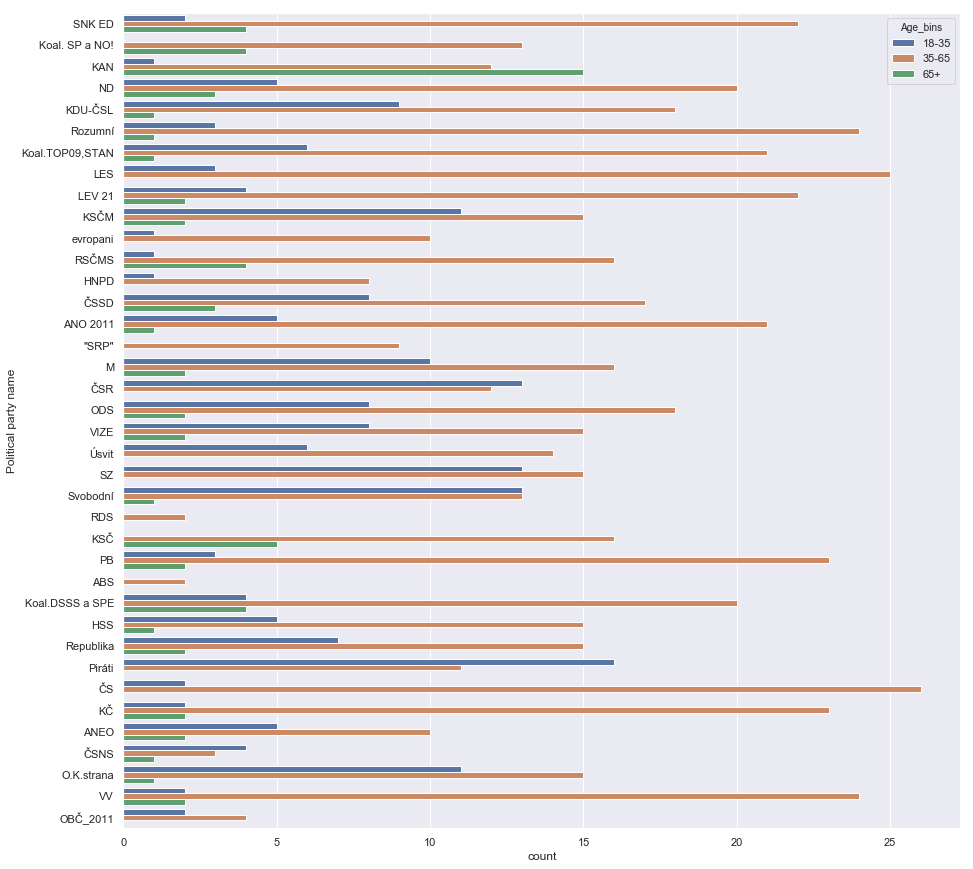

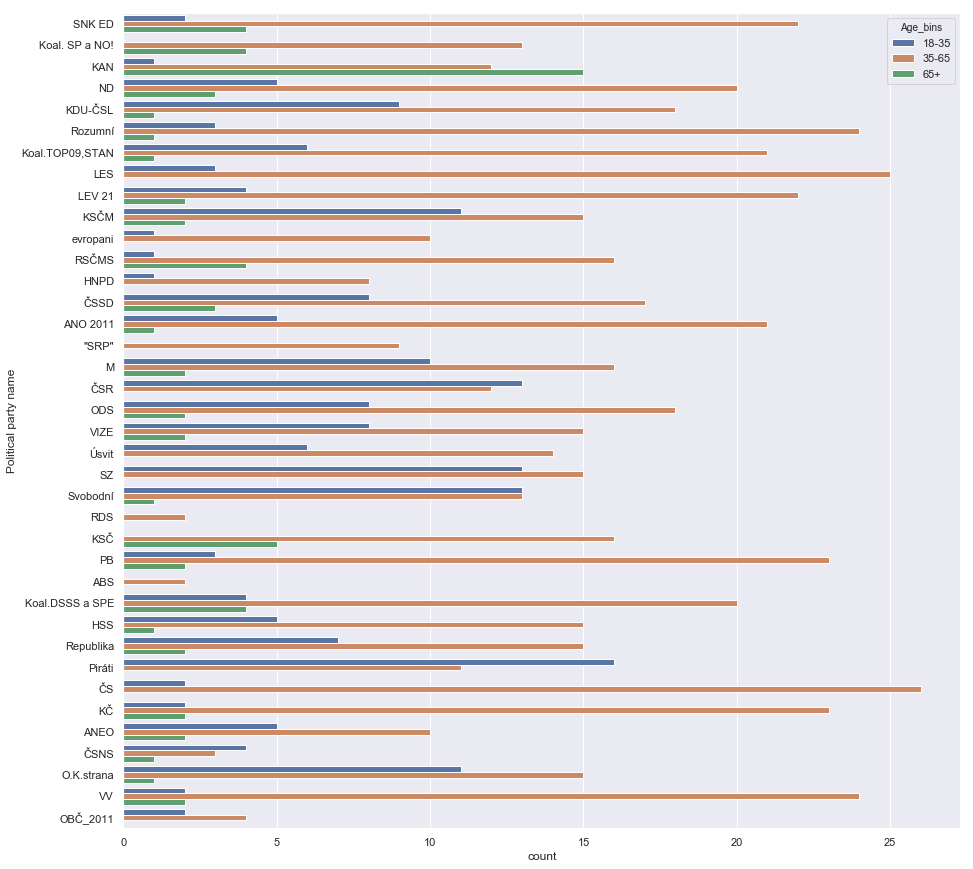

In [10]:
sns.set(rc={'figure.figsize':(15,15)})
g = sns.countplot(y="Political party name", hue="Age_bins", data=df)

We can now extract the title out off candidate name. Let's look at the data.

In [11]:
df[['titul1', 'titul2']] = df["Candidate name"].str.split(' ', expand = True)[[2,3]]

In [12]:
df.titul1.unique()

array(['Mgr.', 'Doc.', None, 'Ing.', 'Bc.', 'PhDr.', 'RNDr.', 'PaedDr.',
       'MUDr.', 'JUDr.', 'Prof.', 'Benjamin', 'Lic.', 'Karel', 'MVDr.',
       'Gabriela', 'prof.', 'Dott.', 'MgA.', 'BA,', 'PhDr.Ing.Mgr.et',
       'BBA', 'Tereza', 'doc.', 'Dr.', 'Dipl.-Kfm.', 'Dr.sc.agr.', 'DiS.',
       'Kateřina', 'Hung', 'M.Sc.', 'Richard', 'DiS.,', 'M.Phil.', 'Anna',
       'Veronika', 'Jana', 'RSDr.', 'Miki', 'Elvis', 'Mgr.A.', 'Mário',
       'Pavlína', 'Soňa', 'Marie', 'ThDr.', 'Alžběta'], dtype=object)

array(['Mgr.', 'Doc.', None, 'Ing.', 'Bc.', 'PhDr.', 'RNDr.', 'PaedDr.',
       'MUDr.', 'JUDr.', 'Prof.', 'Benjamin', 'Lic.', 'Karel', 'MVDr.',
       'Gabriela', 'prof.', 'Dott.', 'MgA.', 'BA,', 'PhDr.Ing.Mgr.et',
       'BBA', 'Tereza', 'doc.', 'Dr.', 'Dipl.-Kfm.', 'Dr.sc.agr.', 'DiS.',
       'Kateřina', 'Hung', 'M.Sc.', 'Richard', 'DiS.,', 'M.Phil.', 'Anna',
       'Veronika', 'Jana', 'RSDr.', 'Miki', 'Elvis', 'Mgr.A.', 'Mário',
       'Pavlína', 'Soňa', 'Marie', 'ThDr.', 'Alžběta'], dtype=object)

Some candidates have a name, that contains 3 words. In this case for the title will be used the value from the next column. All titles end with a dot.

In [13]:
df['titul1'] = np.where(df['titul1'].str.endswith('.') == True, df['titul1'], df['titul2'])

Replace None value to "No title" string and combine different titles into groups. 

In [14]:
df.titul1.fillna(value='No title', inplace=True)
#df.titul2.fillna(value='No', inplace=True)

bachelor = ['Bc.', 'BBA', 'BcA.']
master = ['Mgr.', 'LL.M.', 'MgA.', 'Ing.', 'M.Sc.', 'M.Phil.', 'Mgr.A.', ]
## Some candidates have "Mgr. Ph.D. " and I left a higher title
df['titul1'] = np.where(df['titul2'] == 'Ph.D.', df['titul2'], df['titul1'])

df.loc[df.titul1.isin(bachelor), 'titul1'] = 'Bachelor'
df.loc[df.titul1.isin(master), 'titul1'] = 'Master'
df.loc[~(df.titul1.isin(['Bachelor', 'Master', 'No title'])), 'titul1'] = 'Doctor'

In [15]:
df.titul1.unique()

array(['Doctor', 'Master', 'No title', 'Bachelor'], dtype=object)

array(['Doctor', 'Master', 'No title', 'Bachelor'], dtype=object)

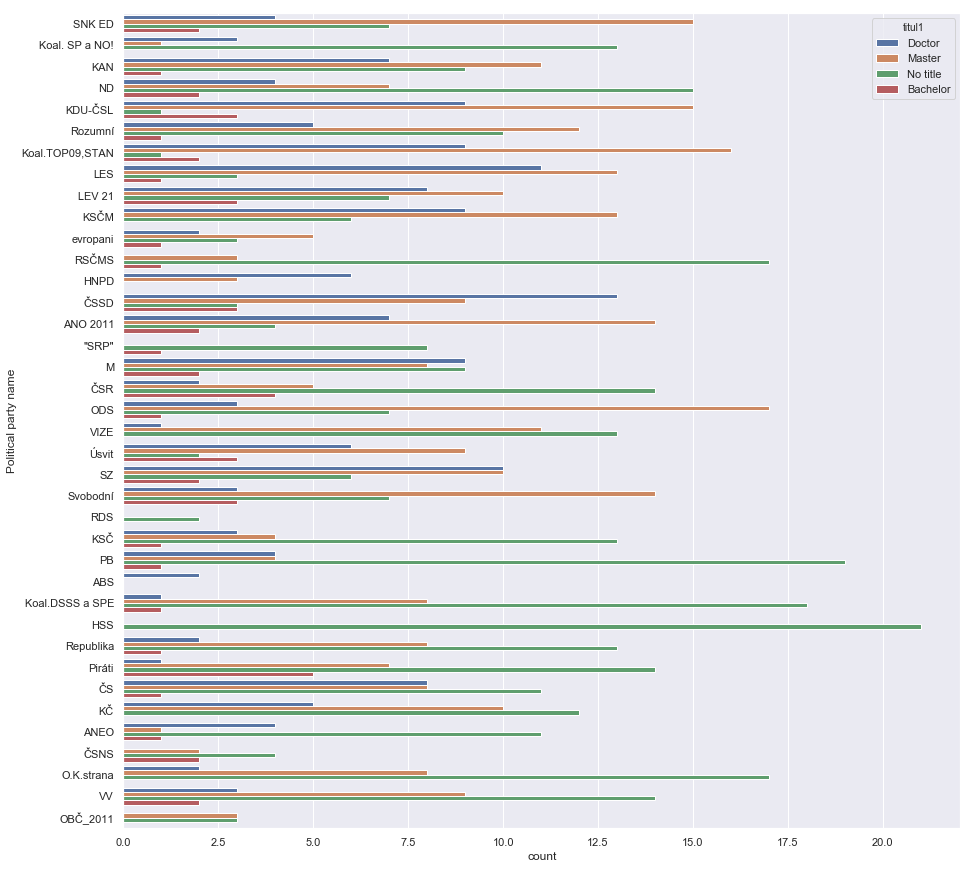

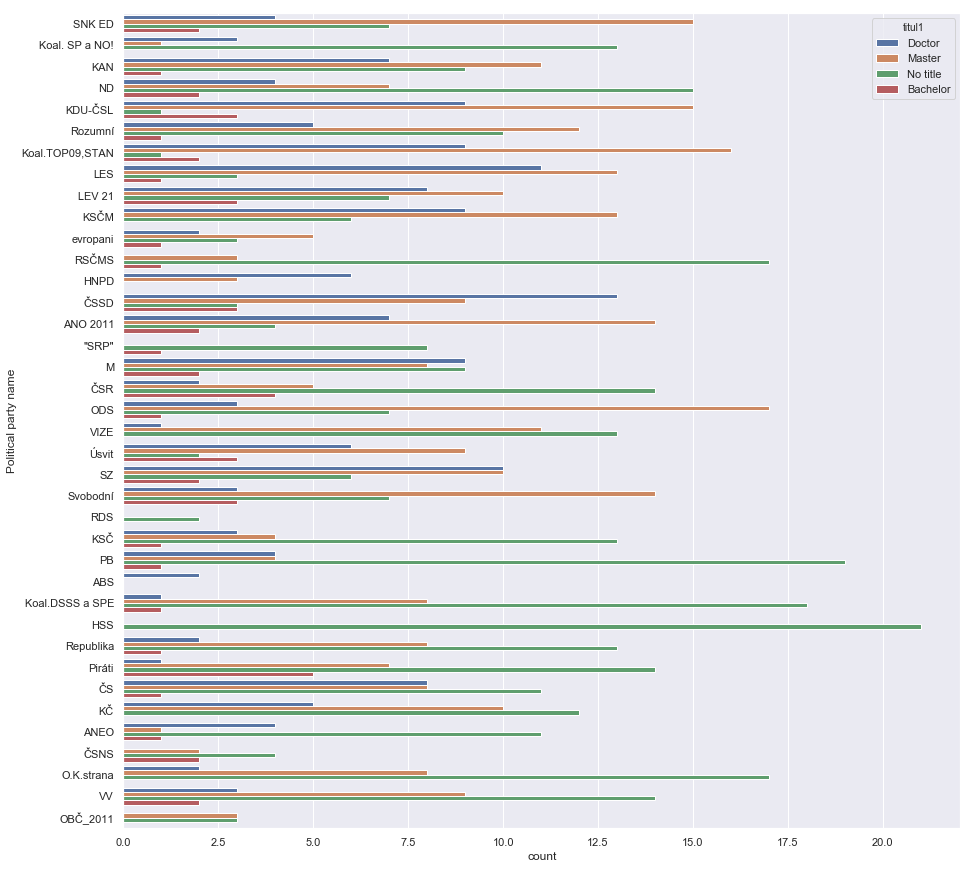

In [16]:
sns.set(rc={'figure.figsize':(15,15)})
g = sns.countplot(y="Political party name", hue="titul1", data=df)

Add a column containing information about the candidate sex. All Czech female last names end with "ova".

In [17]:
df['sex'] = np.where(df['Candidate name'].str.contains("ová"), 'Female','Male')

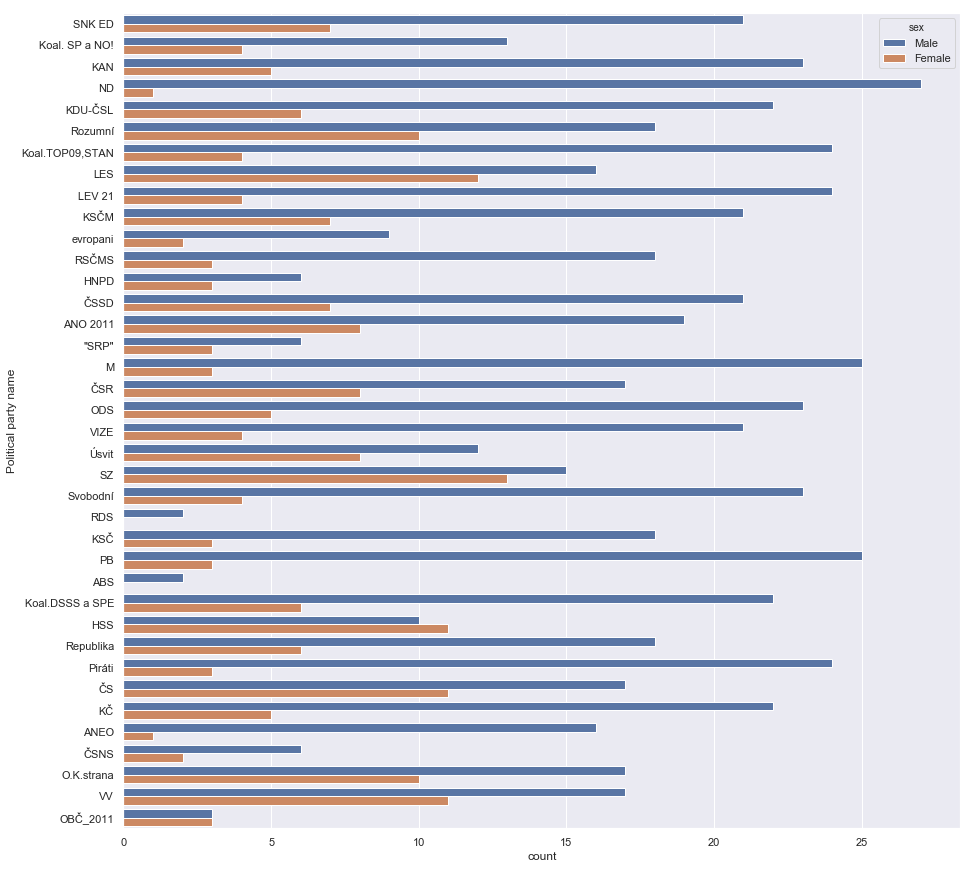

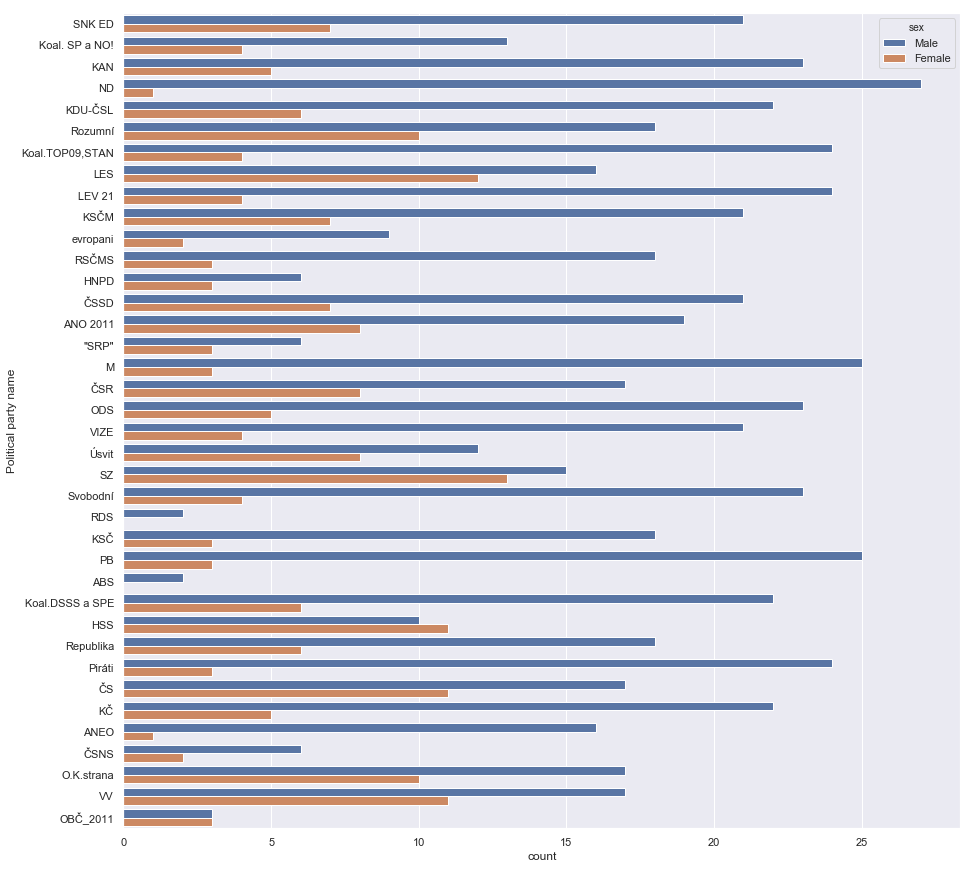

In [18]:
sns.countplot(y="Political party name", hue="sex", data=df)

In [19]:
df.groupby(['Political party name'], sort=True)['Preferred voices %'].max()

Political party name
"SRP"               6.09
ABS                10.77
ANEO               16.42
ANO 2011           20.77
HNPD               12.22
HSS                 5.63
KAN                16.72
KDU-ČSL            14.73
KSČ                 3.42
KSČM               16.91
Koal. SP a NO!      6.07
Koal.DSSS a SPE    17.57
Koal.TOP09,STAN    32.15
KČ                  7.43
LES                22.05
LEV 21             38.99
M                   8.54
ND                 15.27
O.K.strana         40.44
OBČ_2011           12.47
ODS                17.09
PB                 19.86
Piráti             17.43
RDS                27.42
RSČMS               8.63
Republika          26.65
Rozumní             5.73
SNK ED             27.53
SZ                 21.83
Svobodní           16.60
VIZE               18.38
VV                 36.92
evropani            9.19
Úsvit              10.39
ČS                 13.23
ČSNS               11.95
ČSR                25.16
ČSSD               26.91
Name: Preferred voices %, dty

Political party name
"SRP"               6.09
ABS                10.77
ANEO               16.42
ANO 2011           20.77
HNPD               12.22
HSS                 5.63
KAN                16.72
KDU-ČSL            14.73
KSČ                 3.42
KSČM               16.91
Koal. SP a NO!      6.07
Koal.DSSS a SPE    17.57
Koal.TOP09,STAN    32.15
KČ                  7.43
LES                22.05
LEV 21             38.99
M                   8.54
ND                 15.27
O.K.strana         40.44
OBČ_2011           12.47
ODS                17.09
PB                 19.86
Piráti             17.43
RDS                27.42
RSČMS               8.63
Republika          26.65
Rozumní             5.73
SNK ED             27.53
SZ                 21.83
Svobodní           16.60
VIZE               18.38
VV                 36.92
evropani            9.19
Úsvit              10.39
ČS                 13.23
ČSNS               11.95
ČSR                25.16
ČSSD               26.91
Name: Preferred voices %, dty

Let's find the most successful candidate in each political party.          

In [20]:
most_successful = df.loc[df.groupby(['Political party name'])['Preferred voices %'].idxmax()]  
most_successful.sort_values(by = ['Preferred voices %'], ascending= False)

,Political party #,Political party name,Candidate #,Candidate name,Candidate age,Proposing Party,Political jurisdiction,Preferred voices abs.,Preferred voices %,Mandate,Order,Age_bins,titul1,titul2,sex
788,37,O.K.strana,1,Černý Pavel Mgr.,46,O.K. strana,O.K. strana,1 408,40.44,-,-,35-65,Master,None,Male
213,9,LEV 21,1,Paroubek Jiří Ing.,61,LEV 21,LEV 21,2 768,38.99,-,-,35-65,Master,None,Male
815,38,VV,1,John Radek Mgr.,59,VV,VV,2 580,36.92,-,-,35-65,Master,None,Male
158,7,"Koal.TOP09,STAN",2,Pospíšil Jiří JUDr.,38,TOP 09,BEZPP,77 724,32.15,*,1,35-65,Doctor,None,Male
0,1,SNK ED,1,Kroupa Daniel Mgr. Ph.D.,65,SNK ED,BEZPP,2 192,27.53,-,-,35-65,Doctor,Ph.D.,Male
556,25,RDS,2,Tancoš Miroslav,54,RDS,RDS,325,27.42,-,-,35-65,No title,None,Male
310,14,ČSSD,1,Keller Jan prof. PhDr. CSc.,59,ČSSD,BEZPP,57 812,26.91,*,1,35-65,Doctor,PhDr.,Male
658,31,Republika,2,Jurinová Eva Mgr.,59,Republika,BEZPP,597,26.65,-,-,35-65,Master,None,Female
402,19,ČSR,1,Diepoldová Tereza Bc.,25,ČSR,BEZPP,638,25.16,-,-,18-35,Bachelor,None,Female
187,8,LES,3,Sommerová Olga Doc. MgA.,64,LES,LES,1 657,22.05,-,-,35-65,Doctor,MgA.,Female


,Political party #,Political party name,Candidate #,Candidate name,Candidate age,Proposing Party,Political jurisdiction,Preferred voices abs.,Preferred voices %,Mandate,Order,Age_bins,titul1,titul2,sex
788,37,O.K.strana,1,Černý Pavel Mgr.,46,O.K. strana,O.K. strana,1 408,40.44,-,-,35-65,Master,None,Male
213,9,LEV 21,1,Paroubek Jiří Ing.,61,LEV 21,LEV 21,2 768,38.99,-,-,35-65,Master,None,Male
815,38,VV,1,John Radek Mgr.,59,VV,VV,2 580,36.92,-,-,35-65,Master,None,Male
158,7,"Koal.TOP09,STAN",2,Pospíšil Jiří JUDr.,38,TOP 09,BEZPP,77 724,32.15,*,1,35-65,Doctor,None,Male
0,1,SNK ED,1,Kroupa Daniel Mgr. Ph.D.,65,SNK ED,BEZPP,2 192,27.53,-,-,35-65,Doctor,Ph.D.,Male
556,25,RDS,2,Tancoš Miroslav,54,RDS,RDS,325,27.42,-,-,35-65,No title,None,Male
310,14,ČSSD,1,Keller Jan prof. PhDr. CSc.,59,ČSSD,BEZPP,57 812,26.91,*,1,35-65,Doctor,PhDr.,Male
658,31,Republika,2,Jurinová Eva Mgr.,59,Republika,BEZPP,597,26.65,-,-,35-65,Master,None,Female
402,19,ČSR,1,Diepoldová Tereza Bc.,25,ČSR,BEZPP,638,25.16,-,-,18-35,Bachelor,None,Female
187,8,LES,3,Sommerová Olga Doc. MgA.,64,LES,LES,1 657,22.05,-,-,35-65,Doctor,MgA.,Female


## Interactive part.

For interactive selection was used widgets. To install on the command line:

* pip install ipywidgets

In [21]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [22]:
party = df['Political party name'].unique()

In [23]:
@interact
def show_one_party(column=party):
    party = df.loc[df['Political party name'] == column]
    sns.set(rc={'figure.figsize':(15,5)})
    fig, ax =plt.subplots(1,3)
    sns.countplot(party['titul1'], ax=ax[0])
    sns.countplot(party['Age_bins'], ax=ax[1])
    sns.countplot(party['sex'], ax=ax[2])
    fig.show()
    return party

interactive(children=(Dropdown(description='column', options=('SNK ED', 'Koal. SP a NO!', 'KAN', 'ND', 'KDU-ČS…

interactive(children=(Dropdown(description='column', options=('SNK ED', 'Koal. SP a NO!', 'KAN', 'ND', 'KDU-ČS…

Now we can find candidates who already participated in the elections in 2009. To do this, we also load the data (
https://www.volby.cz/pls/ep2009/ep2111?xjazyk=CZ&xv=1&xt=2&xstrana=0 ) and rename the column headers.
Next, add a column containing information that the person participates a second time (True if candidate have already participated).

In [24]:
tables = pd.read_html("https://www.volby.cz/pls/ep2009/ep2111?xjazyk=CZ&xv=1&xt=2&xstrana=0", \
                      skiprows = 2, decimal = ",", thousands = ".")

df_2009 = pd.DataFrame(tables[0])
df_2009.columns = columns_name
df = df.assign(Participated=df['Candidate name'].isin(df_2009['Candidate name']))

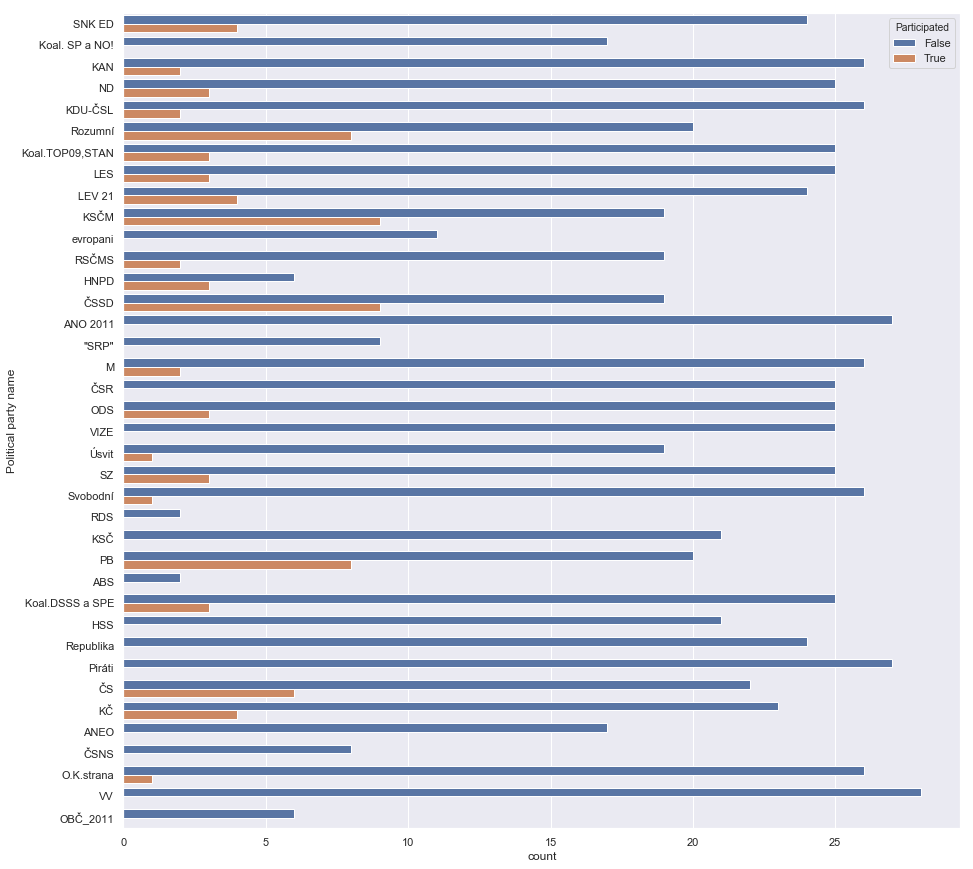

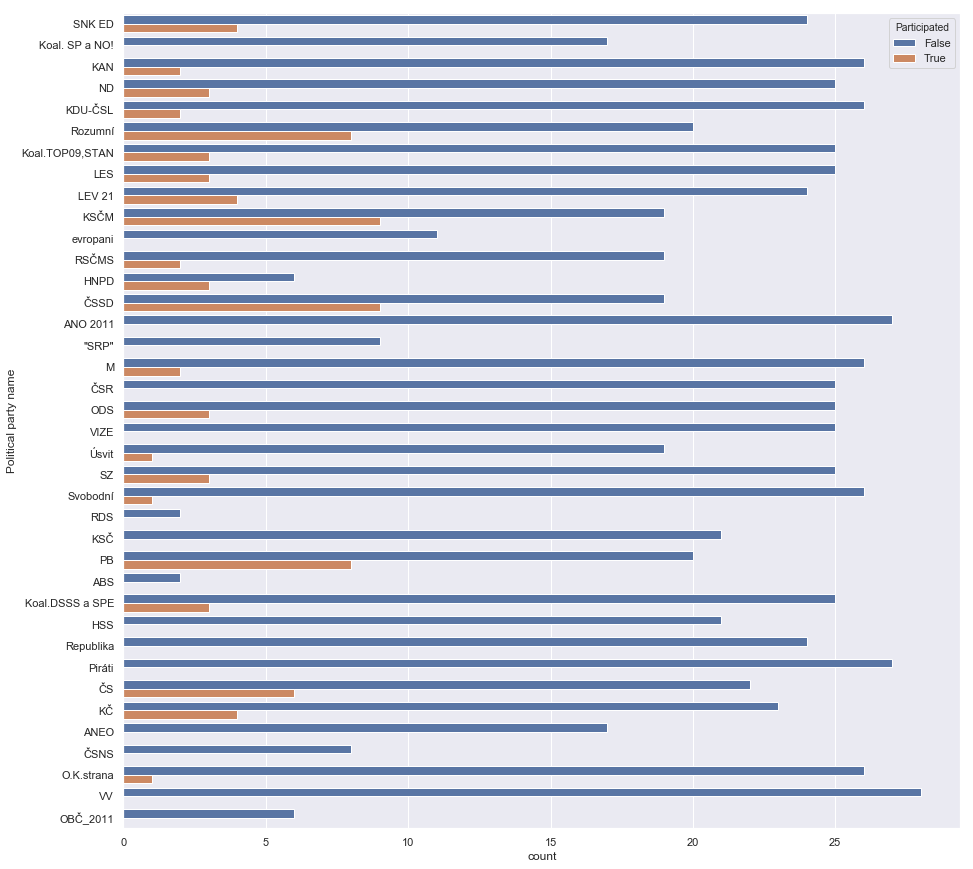

In [25]:
sns.set(rc={'figure.figsize':(15,15)})
sns.countplot(y="Political party name", hue="Participated", data=df)